# Dự đoán điểm cuối kì của sinh viên dựa trên dữ liệu học thuật và xã hội.

## Bộ dữ liệu
- **Nguồn**: [UCI Student Performance](https://archive.ics.uci.edu/ml/datasets/Student+Performance)
- **Mô tả**: Bộ dữ liệu chứa thông tin về học lực của sinh viên dựa trên các yếu tố học thuật và xã hội. Dữ liệu bao gồm các thuộc tính như điểm số, thời gian học tập, hoàn cảnh gia đình, và các yếu tố xã hội khác. Thông tin chi tiết về bộ dữ liệu có thể được tìm thấy trong liên kết trên.

## Mô hình
Sử dụng thuật toán Random Forest để dự đoán điểm cuối kì (G3) của sinh viên dựa trên các thuộc tính khác trong bộ dữ liệu. Mục tiêu là xây dựng một mô hình có khả năng dự đoán chính xác điểm số cuối kì dựa trên các yếu tố học thuật và xã hội.

In [29]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [30]:
# Load dataset
data = pd.read_csv('data/student-mat.csv', sep=';')
print(data.head())

  school sex  age address famsize Pstatus  ...  Walc  health absences  G1  G2  G3
0     GP   F   18       U     GT3       A  ...     1       3        6   5   6   6
1     GP   F   17       U     GT3       T  ...     1       3        4   5   5   6
2     GP   F   15       U     LE3       T  ...     3       3       10   7   8  10
3     GP   F   15       U     GT3       T  ...     1       5        2  15  14  15
4     GP   F   16       U     GT3       T  ...     2       5        4   6  10  10

[5 rows x 33 columns]


In [31]:
# Data exploration
print('Shape of the dataset:', data.shape)
print('Missing values in each column:')
print(data.isnull().sum())

Shape of the dataset: (395, 33)
Missing values in each column:
school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64


In [32]:
# Feature selection
X = data.drop(columns=['G3'])
y = data['G3']

# Identify categorical and numerical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(exclude=['object']).columns.tolist()

print('Categorical features:', categorical_features)
print('Numerical features:', numerical_features)


Categorical features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']
Numerical features: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']


In [33]:
# Missing value imputation
numercial_transformer = SimpleImputer(strategy='mean')

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [34]:
# Preprocessing and model pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numercial_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))
])


In [35]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Model training
model.fit(X_train, y_train)

,steps,"[('preprocessor', ...), ('regressor', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('cat', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [37]:
# Prediction
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nRegression Model Evaluation (test):")
print(f"Mean Absolute Error (MAE): {mae:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
print(f"R-squared (R²): {r2:.4f}")



Regression Model Evaluation (test):
Mean Absolute Error (MAE): 1.1967
Mean Squared Error (MSE): 3.9925
Root Mean Squared Error (RMSE): 1.9981
R-squared (R²): 0.8053


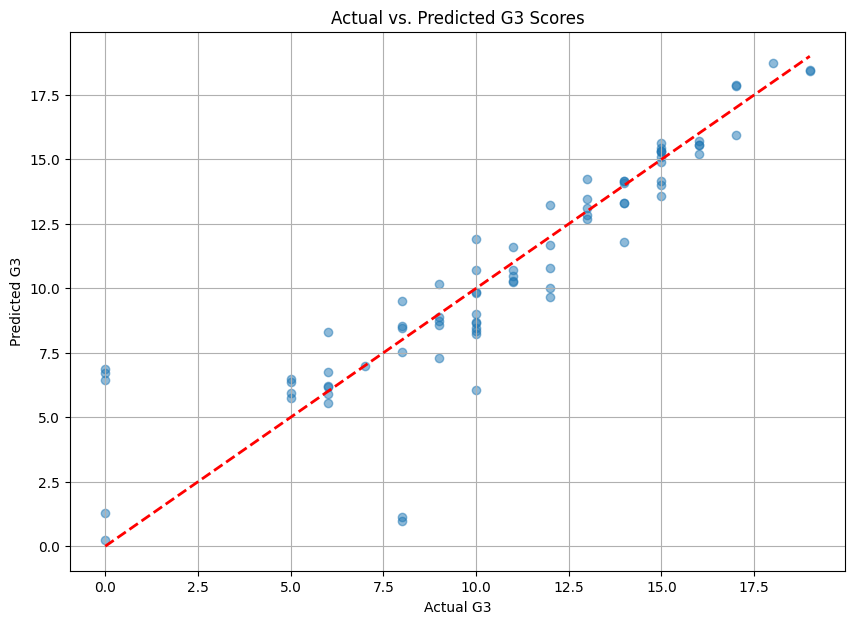

In [38]:
# Actual vs. Predicted Plot
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], '--', color='red', linewidth=2)
plt.xlabel('Actual G3')
plt.ylabel('Predicted G3')
plt.title('Actual vs. Predicted G3 Scores')
plt.grid(True)
plt.show()


In [39]:
# Feature Importance
ohe = model.named_steps["preprocessor"].named_transformers_["cat"]
cat_feature_names = ohe.get_feature_names_out(categorical_features)
all_feature_names = np.concatenate([numerical_features, cat_feature_names])

importances = model.named_steps["regressor"].feature_importances_

feature_importance_df = pd.DataFrame({'Feature': all_feature_names, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_df)



Feature Importances:
              Feature  Importance
14                 G2    0.792268
12           absences    0.109791
36        reason_home    0.019529
0                 age    0.010111
13                 G1    0.006149
6              famrel    0.004639
8               goout    0.003959
35      reason_course    0.003772
11             health    0.003525
4           studytime    0.003310
56        romantic_no    0.002905
10               Walc    0.002561
41     guardian_other    0.002299
40    guardian_mother    0.002219
49     activities_yes    0.002136
2                Fedu    0.001778
48      activities_no    0.001615
33      Fjob_services    0.001582
43      schoolsup_yes    0.001505
32         Fjob_other    0.001491
7            freetime    0.001452
42       schoolsup_no    0.001361
29       Mjob_teacher    0.001184
9                Dalc    0.001083
1                Medu    0.001048
27         Mjob_other    0.001014
30       Fjob_at_home    0.000968
3          traveltime    0

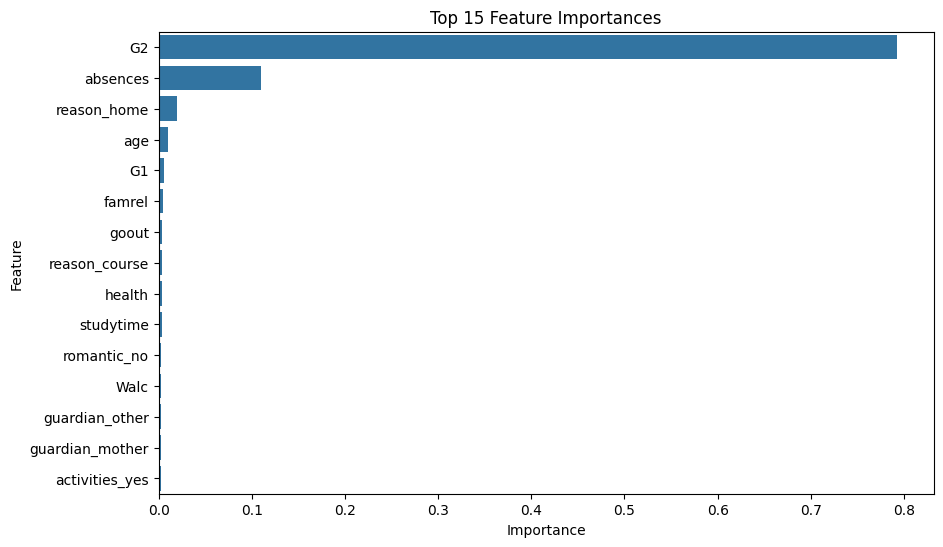

In [40]:
# Top 15 feature importance
top_features = feature_importance_df.head(15)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_features['Importance'], y=top_features['Feature'])
plt.title("Top 15 Feature Importances")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [41]:
# Export the model
import joblib

joblib.dump(model, 'student_performance_regressor.joblib')

print("Model exported to student_performance_regressor.joblib")


Model exported to student_performance_regressor.joblib
